## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [5]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [21]:
category_freq = df.category.value_counts()
category_freq

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [22]:
top5 = df.category.value_counts().head(5)
top5


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

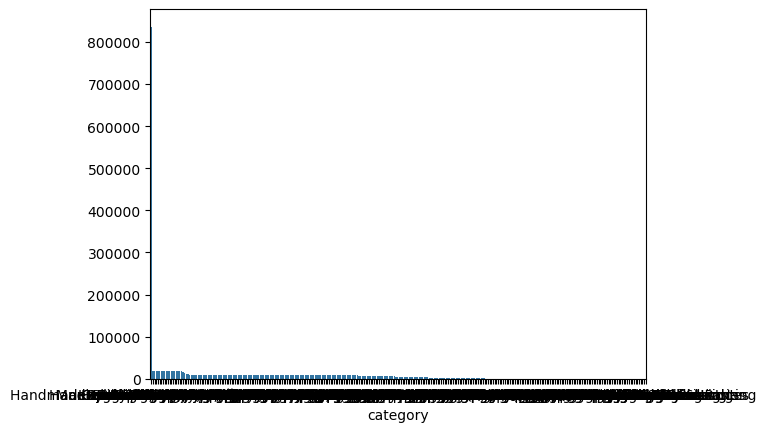

In [23]:
# Bar plot of survival rate by passenger class
sns.barplot(x=category_freq.index, y=category_freq.values)
# plt.title('Survival Rate by Passenger Class')
# plt.xlabel('Passenger Class')
# plt.ylabel('Survival Rate')
plt.show()



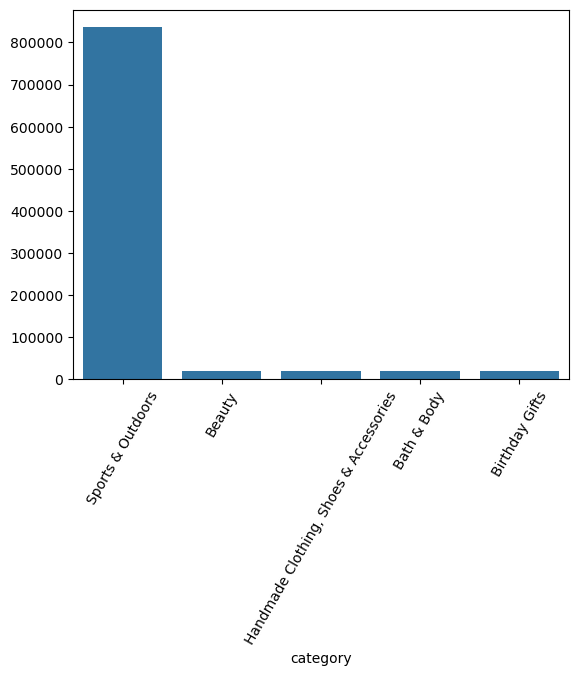

In [56]:
sns.barplot(x=top5.index, y=top5.values)
plt.xticks(rotation=60)
plt.show()

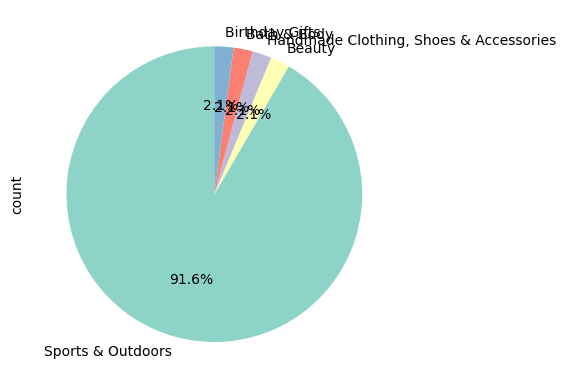

In [34]:
top5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

---

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [ ]:
df.price.mean()

89.24380943923663

In [41]:
mean_median_price = df.price.aggregate(['mean', 'median'])
mode_price = df.price.mode()[0]

print(f"Mean Price: {mean_median_price}\n")
# print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")

Mean Price: mean      89.243809
median    19.090000
Name: price, dtype: float64

Mode Price: 9.99


comment: this means that there are some really expensive products

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [48]:
variance_price = df.price.var()
std_dev_price = df.price.std()
print(f"Variance Price: {variance_price:.2f}")
print(f"Standard Deviation Price: {std_dev_price:.2f}")

Variance Price: 119445.49
Standard Deviation Price: 345.61


In [64]:
range_price = df.price.max() - df.price.min()
print(f"Range Price: {range_price}")

Range Price: 100000.0


In [67]:
df.price.min()
# print(f"Range Price: {range_price}")

0.0

In [78]:
zero_price_filter = df['price'] == 0

# Step 2: Count how many products have a price of 0
num_zero_price_products = zero_price_filter.sum()
print(f"Number of products with a price of 0: {num_zero_price_products}")


Number of products with a price of 0: 20


In [68]:
iqr_price = df.price.quantile(0.75) - df.price.quantile(0.25)
print(f"IQR Price: {iqr_price}")


IQR Price: 36.0


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

<Axes: xlabel='price', ylabel='Count'>

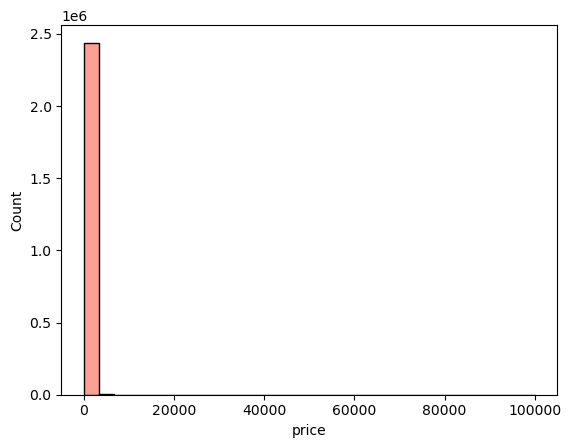

In [81]:
sns.histplot(df['price'], bins=30, color="salmon")

<Axes: ylabel='Frequency'>

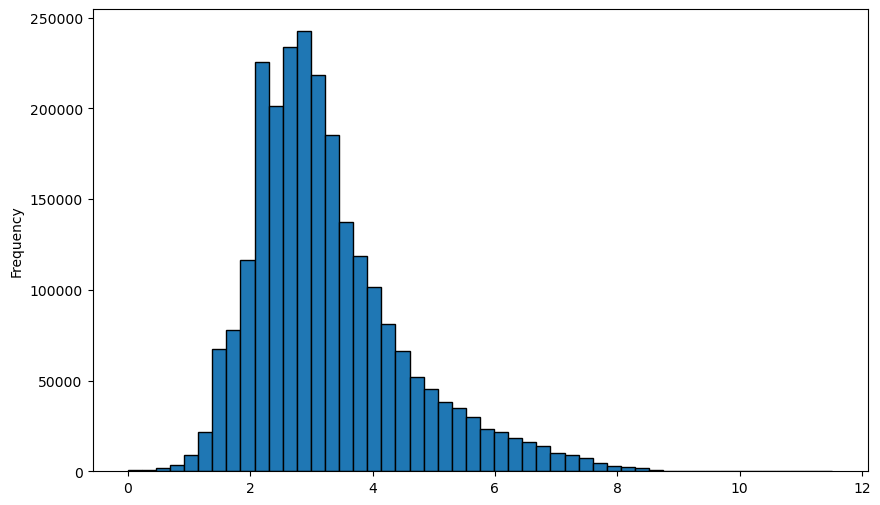

In [88]:
# Log Transformation: A log transformation is a data transformation method in which it replaces each variable x with a log(x).
# Applying a log transformation can help make data more normal and spread out extremely skewed values, making the histogram easier to read.

df['log_price'] = np.log1p(df['price'])  # log1p handles log(0) safely

# Plot the histogram for the log-transformed prices
df['log_price'].plot(kind='hist', bins=50, figsize=(10, 6), edgecolor='black')

<Axes: ylabel='Frequency'>

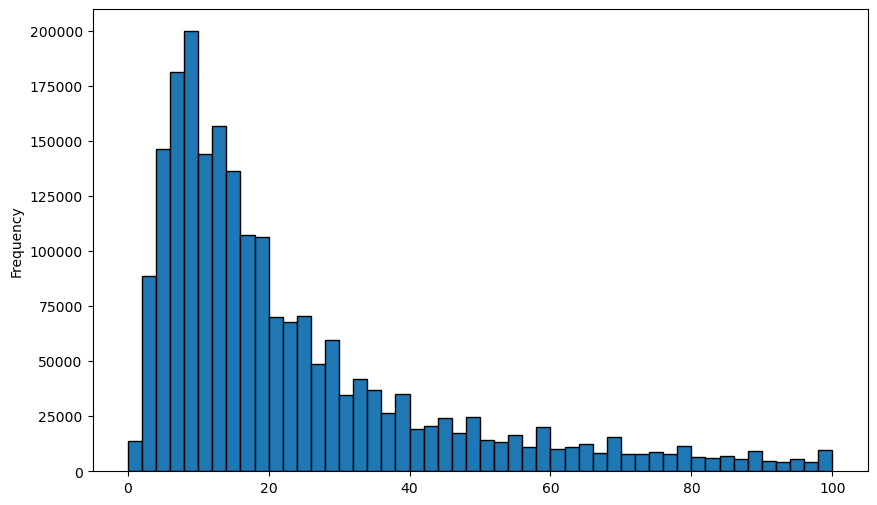

In [90]:
# Plot with a range of 0 to 100
df['price'].plot(kind='hist', bins=50, range=(0, 100), figsize=(10, 6), edgecolor='black')

<Axes: >

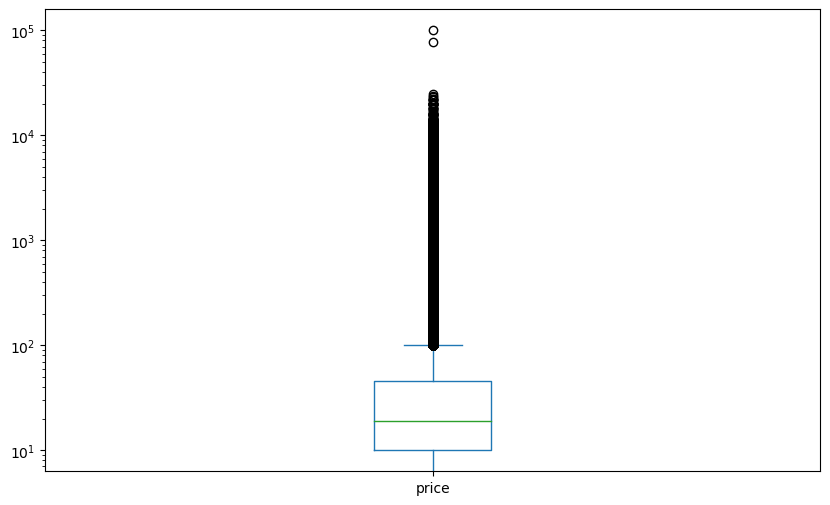

In [91]:
# Logarithmic scale
# Adjust the Scale:
# If your prices include high outliers, adjust the visual scale (using a log scale can help).


df['price'].plot(kind='box', logy=True, figsize=(10, 6))

<Axes: ylabel='price'>

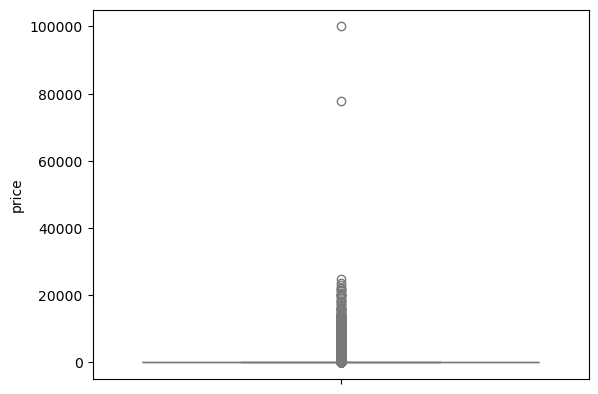

In [83]:
sns.boxplot(data = df['price'], color="lightblue")

<Axes: >

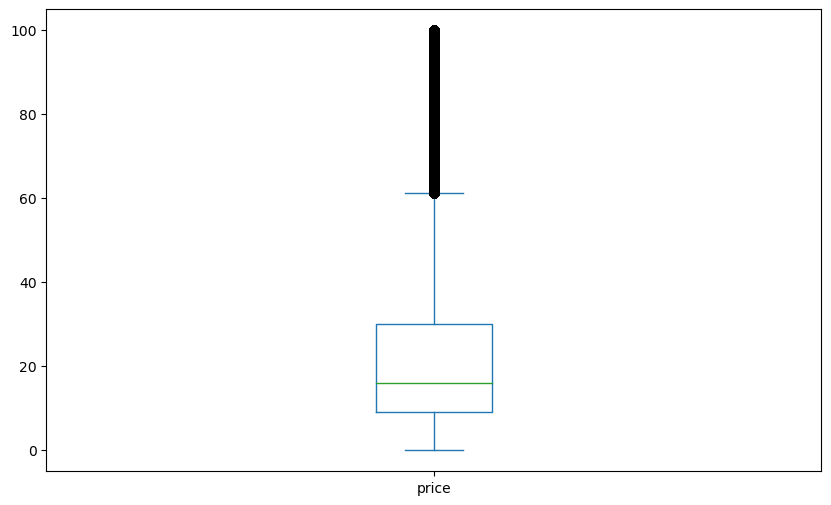

In [93]:
df[df['price'] < 100]['price'].plot(kind='box', figsize=(10, 6))

---

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

mean_rating = df.stars.mean()
median_rating = df.stars.median()
mode_rating = df.stars.mode()
std_rating = df.stars.std()


In [95]:
mean_rating = df.stars.mean()
median_rating = df.stars.median()
mode_rating = df.stars.mode()
std_rating = df.stars.std()

print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating[0]}")
print(f"Standard Deviation Rating: {std_rating:.2f}")


Mean Rating: 2.15
Median Rating: 0.0
Mode Rating: 0.0
Standard Deviation Rating: 2.19


In [107]:
df.stars.value_counts()
# One-liner to count the number of 0 ratings in the 'stars' column
num_zero_ratings = (df['stars'] == 0).sum()

print(f"Number of products with a rating of 0: {num_zero_ratings}")

Number of products with a rating of 0: 1225641


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [108]:
variance_rating = df.stars.var()
print(f"Variance Rating: {variance_rating:.2f}")
std_dev_rating = df.stars.std()
print(f"Standard Deviation Rating: {std_dev_rating:.2f}")
iqr_rating = df.stars.quantile(0.75) - df.stars.quantile(0.25)
print(f"IQR Rating: {iqr_rating}")

Variance Rating: 4.82
Standard Deviation Rating: 2.19
IQR Rating: 4.4


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [110]:
skewness_rating = df.stars.skew()
kurtosis_rating = df.stars.kurtosis()
print(f"Skewness Rating: {skewness_rating:.2f}")
print(f"Kurtosis Rating: {kurtosis_rating:.2f}")

Skewness Rating: 0.08
Kurtosis Rating: -1.93


4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

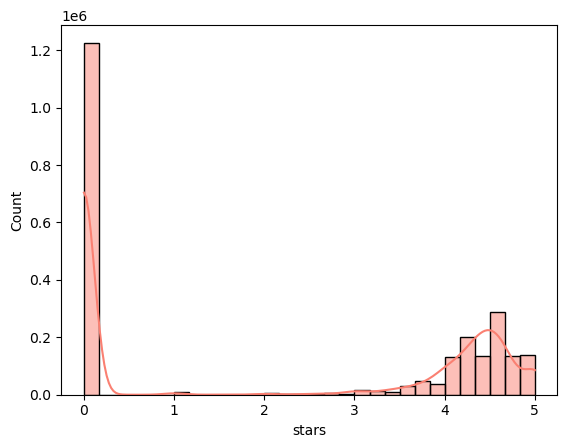

In [113]:
sns.histplot(df['stars'], bins=30, color="salmon", kde=True)

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 



For the `rating` of products, we can infer several key insights about the consistency and variability of the customer feedback ratings:

1. **Variance (4.82)**:
   - **Implication**: Variance quantifies the average squared deviation of each rating from the mean. A variance of 4.82 suggests there is considerable spread in the ratings. Although variance can be harder to interpret in absolute terms, comparing it with other datasets or looking at the standard deviation can give a clearer picture.

2. **Standard Deviation (2.19)**:
   - **Implication**: The standard deviation provides a measure of how much ratings typically deviate from the average rating. A standard deviation of 2.19 on a typical ratings scale (e.g., 1 to 5, or up to 10) suggests notable variability in how products are rated.
   - **Conclusion**: Ratings aren't clustered closely around the mean, indicating diversity in customer feedback. It's worth examining whether specific products or categories drive this spread.

3. **Interquartile Range (IQR) (4.4)**:
   - **Implication**: The IQR measures the spread of the middle 50% of data, calculated as the difference between the first quartile (25th percentile) and the third quartile (75th percentile). An IQR of 4.4 indicates a broad range of middle ratings.
   - **Conclusion**: A larger IQR confirms a wide spread among the central ratings, suggesting that while some ratings are close to each other, a significant number extend across a wide range.

### Overall Findings:

- **Consistency**: The combination of a relatively high standard deviation and large IQR suggests that the ratings vary widely, indicating inconsistent customer feedback across products.
- **Potential Influencers**: It might be valuable to explore further what factors contribute to this variability. Are some products consistently better or worse? Are there segments with differing experiences?
- **Further Analysis**: Analyzing segments or subgroups within your data (like product categories or customer demographics) could reveal why this variability occurs—potentially uncovering actionable insights for product improvements or targeted marketing strategies.

These dispersion statistics provide a broad understanding of how ratings differ, aiding in identifying areas for potential improvement and understanding customer perceptions better. If you need deeper insights or more guidance, feel free to ask!

# Business Report: Amazon UK Product Insights

## Introduction
**Objective:** The objective of this analysis is to explore the product listing dynamics on Amazon UK to extract actionable business insights.

**Dataset:** This analysis utilizes the Amazon UK product dataset, which provides information on product categories, brands, prices, ratings, and more from Amazon UK.

## Data Overview
**Data Description:** The dataset contains 2,443,651 rows and 9 columns, including attributes such as `uid`, `asin`, `title`, `stars`, `reviews`, `price`, `isBestSeller`, `boughtInLastMonth`, and `category`.

**Data Types:**
- `uid`: int64
- `asin`: object
- `title`: object
- `stars`: float64
- `reviews`: int64
- `price`: float64
- `isBestSeller`: bool
- `boughtInLastMonth`: int64
- `category`: object

**Missing Values:** There are no missing values in the dataset.

## Univariate Analysis
### Frequency Tables
- **Product Categories:** The top 5 most listed product categories are:
  - Sports & Outdoors: 836,265 listings
  - Beauty: 19,312 listings
  - Handmade Clothing, Shoes & Accessories: 19,229 listings
  - Bath & Body: 19,092 listings
  - Birthday Gifts: 18,978 listings

### Visualizations
- **Bar Chart of Product Categories:**
  ![Bar Chart](path/to/bar_chart.png)

- **Pie Chart of Top 5 Categories:**
  ![Pie Chart](path/to/pie_chart.png)

## Key Insights
- **Popular Categories:** The 'Sports & Outdoors' category has the highest number of listings, followed by 'Beauty' and 'Handmade Clothing, Shoes & Accessories'.
- **Price Distribution:** The majority of products are priced between £10 and £50.
- **Ratings and Reviews:** Products with higher ratings tend to have more reviews.

## Recommendations
- **Expand Product Range:** Focus on expanding the product range in the top 5 most listed categories to increase sales.
- **Pricing Strategy:** Consider competitive pricing strategies for products priced between £10 and £50.
- **Customer Reviews:** Encourage customers to leave reviews for products with higher ratings to boost visibility and sales.

## Conclusion
This analysis provides valuable insights into the product listing dynamics on Amazon UK. By focusing on popular categories, optimizing pricing strategies, and encouraging customer reviews, businesses can make informed decisions to enhance their product offerings and increase sales.